<a href="https://colab.research.google.com/github/yohanesnuwara/PyGRDECL/blob/master/nuwara/pyGRDECL_getting_started.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/BinWang0213/PyGRDECL

Cloning into 'PyGRDECL'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 314 (delta 6), reused 20 (delta 5), pack-reused 289
Receiving objects: 100% (314/314), 47.21 MiB | 19.88 MiB/s, done.
Resolving deltas: 100% (155/155), done.
Checking out files: 100% (46/46), done.


In [1]:
!pip install vtk

In [0]:
import sys
sys.path.append('/content/PyGRDECL')

In [0]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from GRDECL2VTK import *
import GRDECL2VTK

### Exampel 1 - Load grid data with perm and porosity

In [4]:
import vtk
from GRDECL2VTK import GeologyModel

#Model=GeologyModel(filename='./ExampleData/Simple3x3x1.grdecl')
#Model=GeologyModel(filename='./ExampleData/Simple20x20x5.grdecl')
#Model=GeologyModel(filename='./ExampleData/Simple20x20x5_Fault.grdecl')
#Model=GeologyModel(filename='./ExampleData/Simple10x10x3_Flat_Fault.grdecl')
#Model=GeologyModel(filename='./ExampleData/Simple10x10x3_FlatCross_Fault.grdecl')
#Model=GeologyModel(filename='./ExampleData/40X48x1_3fatults.grdecl')
#Model=GeologyModel(filename='./ExampleData/snarkgrid.grdecl')
Model=GeologyModel(filename='/content/PyGRDECL/ExampleData/dome.grdecl')
#Model=GeologyModel(filename='./ExampleData/pillar_36x48.grdecl')
#Model=GeologyModel(filename='./ExampleData/Johansen.grdecl')
#Model=GeologyModel(filename='./ExampleData/Norne.GRDECL')

Model.GRDECL2VTK()
Model.Write2VTU()

[Input] Reading ECLIPSE/PETREL file "/content/PyGRDECL/ExampleData/dome.grdecl" ....
     Grid Type=CornerPoint
     Grid Dimension(NX,NY,NZ): (20 x 20 x 4)
     NumOfGrids=1600
     NumOfKeywords=11
     Reading Keywords [SPECGRID]      [PORO]      [PERMX]      [PERMY]      [PERMZ] .....Done!
[Geometry] Converting GRDECL to Paraview Hexahedron mesh data....
     NumOfPoints 12800
     NumOfCells 1600
     .....Done!
[Output] Writing "Results/dome.vtu" Paraview file....Done!


[FaultProcess] Found 7 faults.
Added 1 new intersection pts
[FaultProcess] Domain is splitted as 6 polygons.


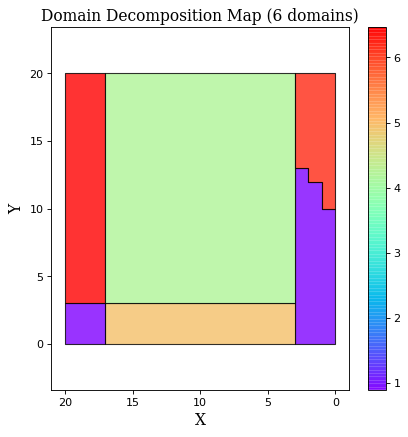

[Output] Writing "Results/dome.vtu" Paraview file....Done!


In [5]:
Model.decomposeModel()
Model.Write2VTU()

In [6]:
Model.Write2VTP()

[Output] Writing "Results/dome.vtu" Paraview file....Done!
[Output] Writing "Results/dome.vtp" VTP file..vtp file created.


### Interactive Visulization directly from Jupyter Notebook (using pyvista)

In [7]:
!pip install pyvista

In [0]:
try:
    import pyvista as pv
except ImportError:
    import warnings
    warnings.warn("No vtk notebook viewer module pyvista loaded.")

In [9]:
mesh = pv.read('Results/dome.vtp')
mesh

PolyData (0x7f84a2713a08)
  N Cells:	9600
  N Points:	12800
  X Bounds:	-2.247e+01, 1.630e+03
  Y Bounds:	-1.242e+03, 5.627e+01
  Z Bounds:	1.999e+03, 2.646e+03
  N Arrays:	6

In [0]:
mesh.plot(scalars="PORO",show_edges=True, notebook=False)

ERROR:root:bad X server connection. DISPLAY=


In [0]:
mesh.plot(scalars="PORO",show_edges=True, notebook=True)

### Exampel 2 - Load grid data and adding any custom field

In [2]:
Model=GeologyModel(filename='/content/PyGRDECL/ExampleData/dome.grdecl')

TempData=Model.LoadCellData(varname="TEMP",filename='./ExampleData/dome_Temperature.txt')
Model.GRDECL2VTK()
Model.Write2VTU()

NameError: ignored